In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/travel insurance.csv")

In [3]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [5]:
df.describe(include='all')

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
count,63326,63326,63326,63326,63326,63326.000000,63326,63326.000000,63326.000000,18219,63326.000000
unique,16,2,2,26,2,NaN,149,NaN,NaN,2,NaN
top,EPX,Travel Agency,Online,Cancellation Plan,No,NaN,SINGAPORE,NaN,NaN,M,NaN
freq,35119,45869,62219,18630,62399,NaN,13255,NaN,NaN,9347,NaN
mean,NaN,NaN,NaN,NaN,NaN,49.317074,NaN,40.702018,9.809992,NaN,39.969981
std,NaN,NaN,NaN,NaN,NaN,101.791566,NaN,48.845637,19.804388,NaN,14.017010
min,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,-389.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,18.000000,0.000000,NaN,35.000000
50%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,26.530000,0.000000,NaN,36.000000
75%,NaN,NaN,NaN,NaN,NaN,53.000000,NaN,48.000000,11.550000,NaN,43.000000


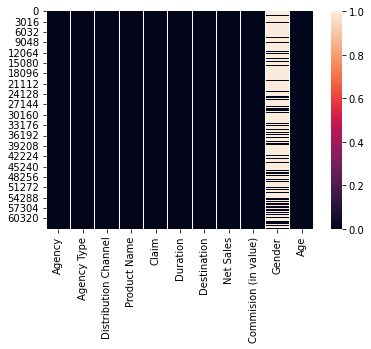

In [6]:
# Lets check the missing values
sns.heatmap(df.isnull())
plt.show()

From above heatmap we can conclude that the Gender column is having null values.

In [7]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

Since Gender column has 45107 null values instead of replacing them its better to drop the column

In [14]:
df.drop("Gender",axis=1,inplace=True)

In [8]:
#Lets see the correlation among the different features as well as with target
df.corr()

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.429235,0.344772,0.002468
Net Sales,0.429235,1.000000,0.651315,0.037756
Commision (in value),0.344772,0.651315,1.000000,0.118348
Age,0.002468,0.037756,0.118348,1.000000


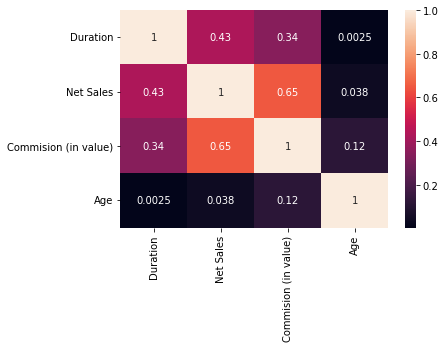

In [13]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

Now there is no missing values.

In [16]:
df.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Age                       int64
dtype: object

In [17]:
df.shape

(63326, 10)

Lets see unique values in each and every column 

---



In [21]:
df.Agency.value_counts().to_frame()

,Agency
EPX,35119
CWT,8580
C2B,8267
JZI,6329
SSI,1056
JWT,749
RAB,725
LWC,689
TST,528
KML,392


There are 16 unique values in Agency

In [26]:
df["Agency Type"].value_counts().to_frame()

,Agency Type
Travel Agency,45869
Airlines,17457


We noticed that there are only two different types of in agencies.

In [27]:
df["Distribution Channel"].value_counts()

Online     62219
Offline     1107
Name: Distribution Channel, dtype: int64

We noticed that there are only two different values in Distribution channel.

In [31]:
df["Product Name"].value_counts().to_frame()

,Product Name
Cancellation Plan,18630
2 way Comprehensive Plan,13158
Rental Vehicle Excess Insurance,8580
Basic Plan,5469
Bronze Plan,4049
1 way Comprehensive Plan,3331
Value Plan,2715
Silver Plan,2249
Annual Silver Plan,1423
Ticket Protector,1056


There are 26 unique types of plans in insurance.

In [32]:
df["Claim"].value_counts()

No     62399
Yes      927
Name: Claim, dtype: int64

It shows only two unique values whether insurance is claimed or not.

In [33]:
df["Destination"].value_counts()

SINGAPORE                 13255
MALAYSIA                   5930
THAILAND                   5894
CHINA                      4796
AUSTRALIA                  3694
                          ...  
SEYCHELLES                    1
SAMOA                         1
NIGERIA                       1
DOMINICAN REPUBLIC            1
BOSNIA AND HERZEGOVINA        1
Name: Destination, Length: 149, dtype: int64

Duration                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Net Sales               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Commision (in value)    AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Age                     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
dtype: object

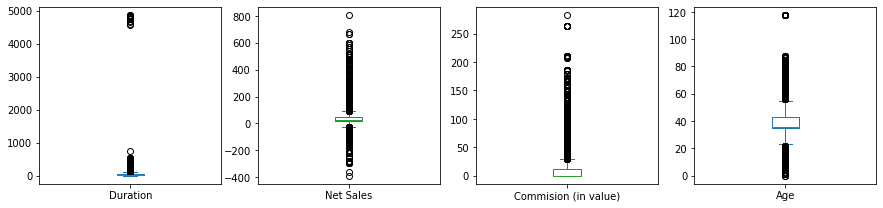

In [37]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))

We can outliers in Duration,Net Sales,Commision,Age.
Among these the Net sales is having more outliers.

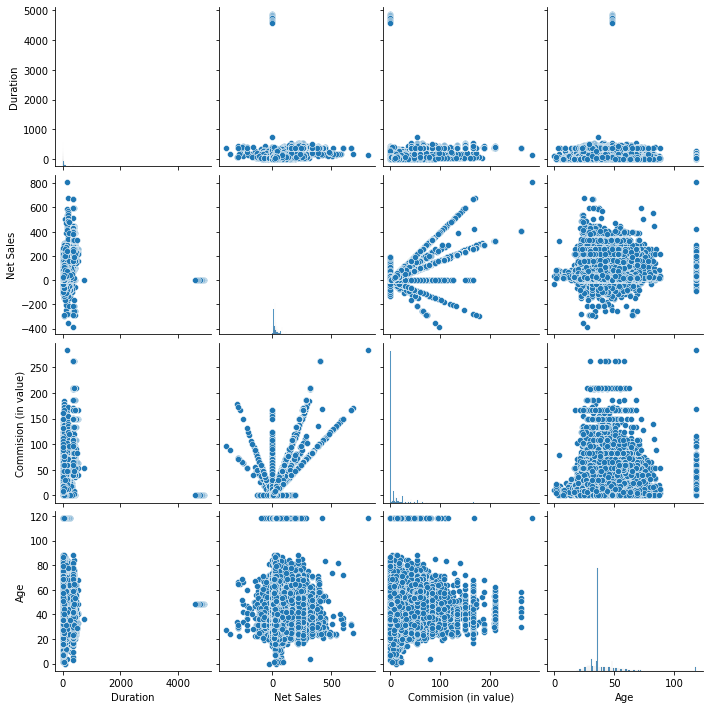

In [38]:
sns.pairplot(df)

Let us seperate the features and target

In [52]:
x=df.drop(['Claim','Agency','Agency Type','Distribution Channel','Product Name','Destination'],axis=1)    
y=df[['Claim']]

In [53]:
x.head()

,Duration,Net Sales,Commision (in value),Age
0,186,-29.0,9.57,81
1,186,-29.0,9.57,71
2,65,-49.5,29.70,32
3,60,-39.6,23.76,32
4,79,-19.8,11.88,41


In [54]:
y.head()

,Claim
0,No
1,No
2,No
3,No
4,No


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model=LogisticRegression()

In [60]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [61]:
pred=model.predict(x_test)

In [62]:
pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9841562269712602